# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "82db759698c15daf45f70abd9fc6998b694cc049"
connection.set_access_token(API_TOKEN)

# Strategy Creation

In [5]:
from stochastic_crossover import StochasticCrossover as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130139,
 'strategyId': '16c7f3681b58494092856f11106e2e3f'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('GOOGL', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:GOOGL'

## Setup Parameters

In [9]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKFWEIK28TM4F3NNEYHR', 
        'CLIENT_API_SECRET': '2RaicNUeV8BWIT8qd3S8wOAqMFLwoRESuM37d5tD'
    }
}

In [10]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [11]:
parameters = {
  'FASTK_PERIOD': 7,
  'SLOWK_PERIOD': 2,
  'SLOWD_PERIOD': 2
}

In [12]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

### Start

In [13]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:GOOGL', 
    lots=15,
    parameters=parameters, 
    candle='1 hour',
    vendor_details=vendor_details,
    initial_funds_virtual=initial_virtual_funds
    
)


Starting the strategy 'Stochastic Crossover US' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════════════════╕
│ Config                  │ Value                                                     │
╞═════════════════════════╪═══════════════════════════════════════════════════════════╡
│ Vendor Name             │ ALPACAV2                                                  │
├─────────────────────────┼───────────────────────────────────────────────────────────┤
│ Strategy Name           │ Stochastic Crossover US                                   │
├─────────────────────────┼───────────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                               │
├─────────────────────────┼───────────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:GOOGL']                                          │
├─────────────────────────┼─────────────────────

### Status

In [14]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [16]:
logs = connection.get_backtesting_logs(strategy)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [17]:
print(logs)

[2023-08-22 20:26:18] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 20:26:18] Sanity checks on cfg successful.
[2023-08-22 20:26:18] Currency set to "USD"
[2023-08-22 20:26:18] Setting up broker connection...
[2023-08-22 20:26:20] Broker connection has been setup successfully.
[2023-08-22 20:26:20] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2023-08-22 20:26:20] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 20:26:20] Welcome ALGOBULLS VIRTUAL USER!
[2023-08-22 20:26:20] Reading strategy...
[2023-08-22 20:26:20] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   

### Stop

In [19]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [20]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0               NASDAQ                    GOOGL 2022-07-18 10:30:00-04:00   
1               NASDAQ                    GOOGL 2022-07-18 12:30:00-04:00   
2               NASDAQ                    GOOGL 2022-07-18 13:30:00-04:00   
3               NASDAQ                    GOOGL 2022-07-18 14:30:00-04:00   
4               NASDAQ                    GOOGL 2022-07-19 09:30:00-04:00   
..                 ...                      ...                       ...   
553             NASDAQ                    GOOGL 2023-07-27 13:30:00-04:00   
554             NASDAQ                    GOOGL 2023-07-27 14:30:00-04:00   
555             NASDAQ                    GOOGL 2023-07-28 09:30:00-04:00   
556             NASDAQ                    GOOGL 2023-07-28 10:30:00-04:00   
557             NASDAQ                    GOOGL 2023-07-31 09:30:00-04:00   

    entry_transaction_type  entry_quantity entry_currency  entry_price  \
0                     SELL              15              $       111.57   
1                      BUY              15              $       111.93   
2                      BUY              15              $       111.93   
3                      BUY              15              $       111.93   
4                      BUY              15              $       110.85   
..                     ...             ...            ...          ...   
553                    BUY              15              $       131.78   
554                    BUY              15              $       131.78   
555                   SELL              15              $       130.67   
556                    BUY              15              $       132.55   
557                   SELL              15              $       132.68   

               exit_timestamp exit_transaction_type  exit_quantity  \
0   2022-07-18 12:30:00-04:00                   BUY             15   
1   2022-07-18 13:30:00-04:00                  SELL             15   
2   2022-07-18 14:30:00-04:00                  SELL             15   
3   2022-07-18 15:30:00-04:00                  SELL             15   
4   2022-07-19 15:30:00-04:00                  SELL             15   
..                        ...                   ...            ...   
553 2023-07-27 14:30:00-04:00                  SELL             15   
554 2023-07-27 15:30:00-04:00                  SELL             15   
555 2023-07-28 10:30:00-04:00                   BUY             15   
556 2023-07-28 15:30:00-04:00                  SELL             15   
557 2023-07-31 15:30:00-04:00                   BUY             15   

    exit_currency  exit_price  pnl_absolute  pnl_cumulative_absolute  
0               $      111.93         -5.40                    -5.40  
1               $      111.93          0.00                    -5.40  
2               $      111.93          0.00                    -5.40  
3               $      111.93          0.00                    -5.40  
4               $      112.50         24.75                    19.35  
..            ...         ...           ...                      ...  
553             $      131.78          0.00                  -189.45  
554             $      131.78          0.00                  -189.45  
555             $      132.55        -28.20                  -217.65  
556             $      133.67         16.80                  -200.85  
557             $      133.03         -5.25                  -206.10  

[558 rows x 14 columns]

## Statistics Reports

### Statistics

In [21]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2022-07-18
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      49.0%

Cumulative Return   -5.02%
CAGR﹪              -4.87%

Sharpe              -0.53
Prob. Sharpe Ratio  21.42%
Sortino             -0.7
Sortino/√2          -0.49
Omega               0.88

Max Drawdown        -7.22%
Longest DD Days     375

Gain/Pain Ratio     -0.15
Gain/Pain (1M)      -0.52

Payoff Ratio        0.98
Profit Factor       0.88
Common Sense Ratio  0.89
CPC Index           0.41
Tail Ratio          1.01
Outlier Win Ratio   8.52
Outlier Loss Ratio  3.43

MTD                 -2.8%
3M                  -1.29%
6M                  -1.02%
YTD                 -1.73%
1Y                  -3.83%
3Y (ann.)           -4.87%
5Y (ann.)           -4.87%
10Y (ann.)          -4.87%
All-time (ann.)     -4.87%

Avg. Drawdown       -7.22%
Avg. Drawdown Days  375
Recovery Factor     -0.7
Ulcer Index         0.04
Serenity Index   

### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2022-07-18
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             49.0%

Cumulative Return          -5.02%
CAGR﹪                     -4.87%

Sharpe                     -0.53
Prob. Sharpe Ratio         21.42%
Smart Sharpe               -0.52
Sortino                    -0.7
Smart Sortino              -0.69
Sortino/√2                 -0.49
Smart Sortino/√2           -0.49
Omega                      0.88

Max Drawdown               -7.22%
Longest DD Days            375
Volatility (ann.)          4.25%
Calmar                     -0.67
Skew                       -0.77
Kurtosis                   7.87

Expected Daily %           -0.01%
Expected Monthly %         -0.4%
Expected Yearly %          -2.54%
Kelly Criterion            -6.55%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.45%
Expected Shortfall (cVaR)  -0.45%

Max Consecutive Win

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-07-21  2023-02-09  2023-07-31   375     -7.216738         -6.269425

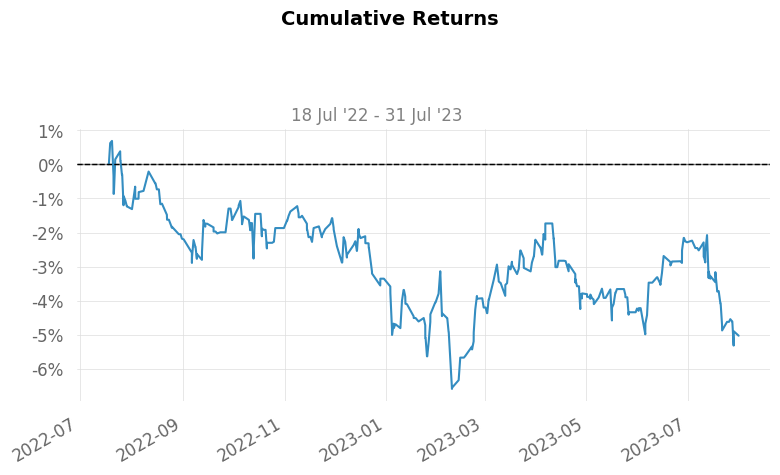

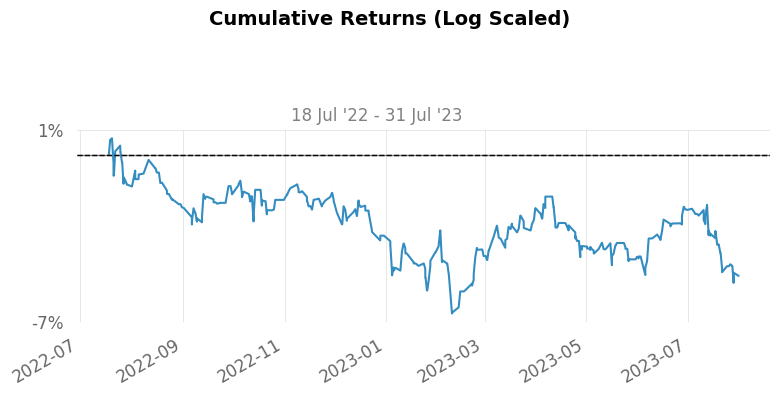

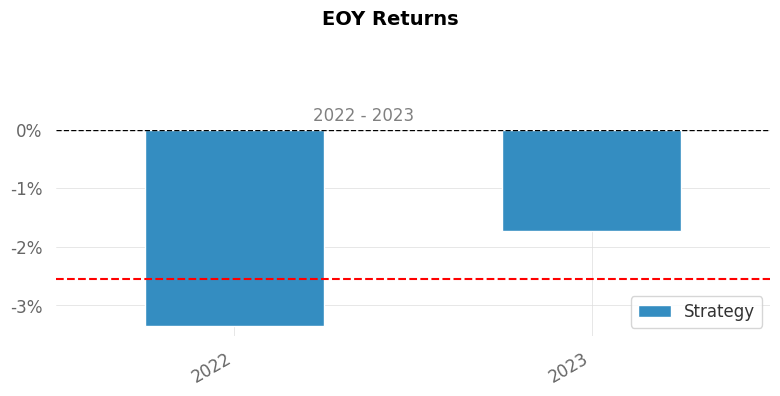

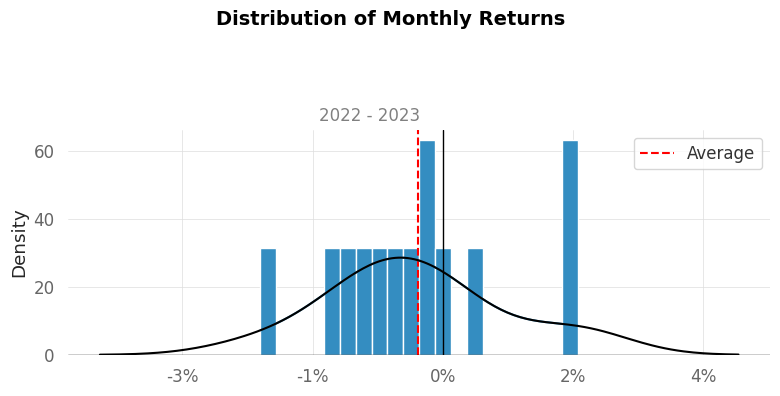

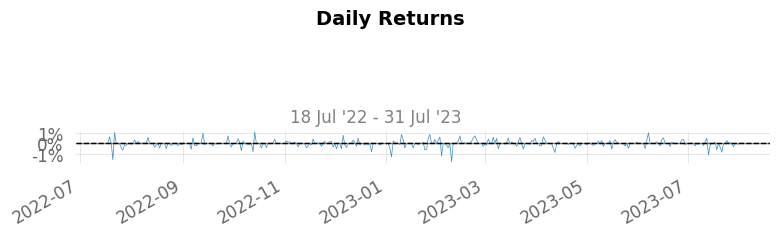

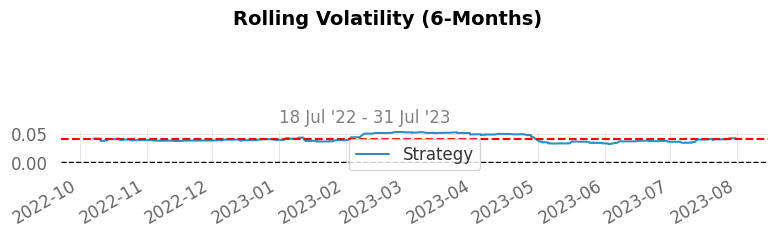

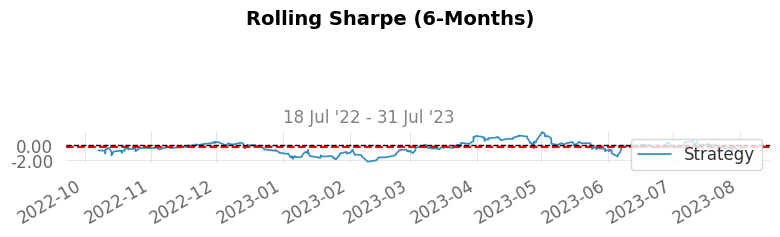

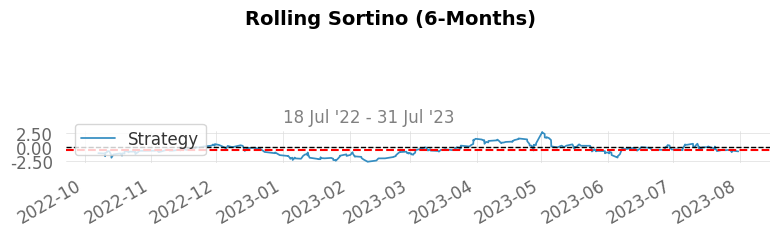

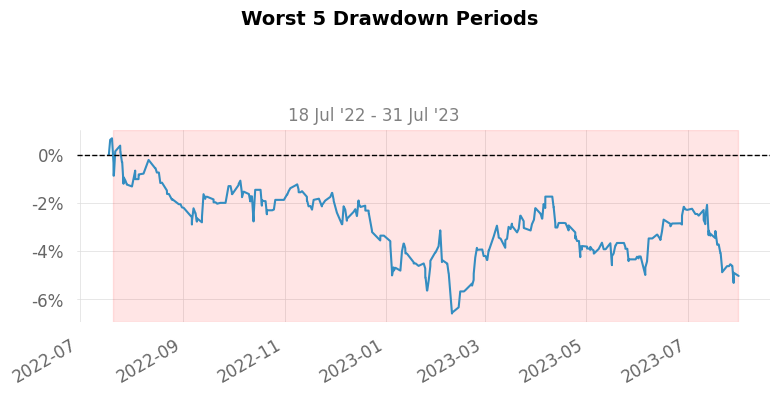

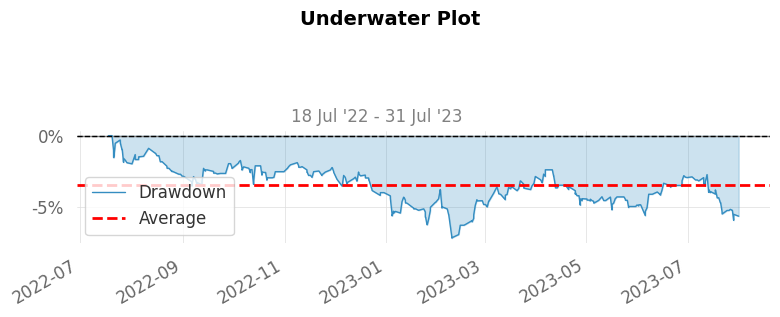

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


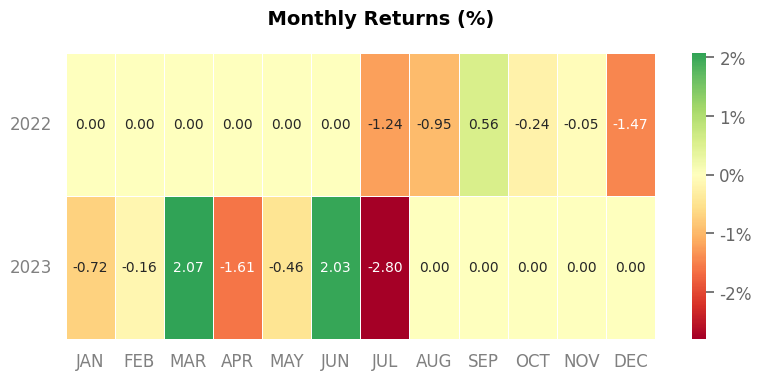

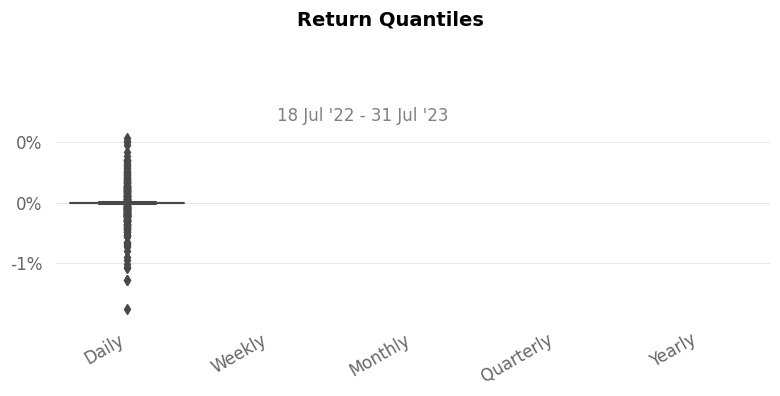

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [22]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True, initial_funds=initial_virtual_funds)

## Order History

In [23]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+-----------------+---------------------------+----------------------------------+------+
| INST            | TIME                      | ID                               | TT   |
|-----------------+---------------------------+----------------------------------+------|
| NASDAQ_EQ:GOOGL | 2022-07-18 10:30:00-04:00 | c00e94e90e5b4c49b44e45e8b36c6192 | SELL |
+-----------------+---------------------------+----------------------------------+------+
+----+----------------------------------+------------------------+-------+
|    | TIME                             | STATE                  | MSG   |
|----+----------------------------------+------------------------+-------|
|  0 | 2022-07-18 10:30:00.500000-04:00 | PUT ORDER REQ RECEIVED |       |
|  1 | 2022-07-18 10:30:00.500000-04:00 | VALIDATION PENDING     |       |
|  2 | 2022-07-18 10:30:00.500000-04:00 | OPEN PENDING           |       |
|  3 | 2022-07-18 10:30:00.500000-04:00 | OPEN                   |       |
|  4 | 2022-07-18 10:30

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:GOOGL', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

### Start

In [27]:
connection.realtrade(
    strategy=strategy, 
    start='9:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:GOOGL', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)


Starting the strategy 'Stochastic Crossover US' in REALTRADING mode...
╒═════════════════╤═══════════════════════════════════════════════════════════╕
│ Config          │ Value                                                     │
╞═════════════════╪═══════════════════════════════════════════════════════════╡
│ Vendor Name     │ ALPACAV2                                                  │
├─────────────────┼───────────────────────────────────────────────────────────┤
│ Broker Name     │ ALPACAV2                                                  │
├─────────────────┼───────────────────────────────────────────────────────────┤
│ Strategy Name   │ Stochastic Crossover US                                   │
├─────────────────┼───────────────────────────────────────────────────────────┤
│ Trading Type    │ REALTRADING                                               │
├─────────────────┼───────────────────────────────────────────────────────────┤
│ Instrument(s)   │ ['NASDAQ:GOOGL']            

### Status

In [28]:
connection.get_realtrading_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)